# Question 1 - What is the Top Complaint Type?

Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?

- Read back the 311 datasets that you stored in Cloud Object Store and explore the dataset.

- Figure out the correct Complaint Type that the Department of Housing Preservation and Development of New York City should focus on.

Import libraries

Get the 311 File from:
https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

Filtered data
https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status

Code:
DHPD_df = pd.read_csv("https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status", parse_dates=True)
DHPD_df.head(5)




## Import libraries

In [104]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import matplotlib.pyplot as plt

### Setup credentials...

In [105]:
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
#

####### for sharing,  remove the api_key_id
       

client_bf9442079d134648bf58e1a33c4d0949 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='<**REPLACE_WITH_YOUR_IBM_API_KEY_ID**>',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_bf9442079d134648bf58e1a33c4d0949.get_object(Bucket='edxcapstone-donotdelete-pr-esmvpgbhnmenoy',Key='nyc-311-dataset-parsed.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )


### Read 311 data

In [106]:
df_311_raw = pd.read_csv(body)
df_311_raw.head()

,Unnamed: 0,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,0,2019-03-23T19:28:55.000,42034156,HEAT/HOT WATER,10032.0,835 RIVERSIDE DRIVE,RIVERSIDE DRIVE,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.836079,-73.946179,2019-03-27T08:17:34.000,RESIDENTIAL BUILDING,Closed
1,1,2019-03-23T17:05:17.000,42034212,UNSANITARY CONDITION,11225.0,348 MAPLE STREET,MAPLE STREET,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.660905,-73.949222,2019-03-27T07:51:44.000,RESIDENTIAL BUILDING,Closed
2,2,2019-03-23T17:25:14.000,42034245,WATER LEAK,10460.0,783 GROTE STREET,GROTE STREET,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.850269,-73.882685,2019-03-28T14:05:19.000,RESIDENTIAL BUILDING,Closed
3,3,2019-03-23T10:27:32.000,42034339,ELECTRIC,10468.0,2800 JEROME AVENUE,JEROME AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.870341,-73.894718,2019-04-08T10:08:17.000,RESIDENTIAL BUILDING,Closed
4,4,2019-03-23T18:07:09.000,42034377,PAINT/PLASTER,10453.0,1775 DAVIDSON AVENUE,DAVIDSON AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.848813,-73.912720,NaN,RESIDENTIAL BUILDING,Open


Assignment focuses on identifying the top complaing type.

<b>How does data look like if we count complaints?</b><br>
Count will be available in a column name: <b>complaint-type-total</b>

In [107]:
df_311_grouped = df_311_raw.groupby(['complaint_type']).count()
df_311_grouped.rename(columns={"Unnamed: 0": "complaint-type-total"}, inplace=True)

Let's take a look at the head of the results

In [108]:
df_311_grouped.head(10)

,complaint-type-total,created_date,unique_key,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
complaint_type,,,,,,,,,,,,,,,
AGENCY,9,9,9,8,9,9,8,8,9,9,8,8,9,9,9
APPLIANCE,108869,108869,108869,108717,108869,108869,108773,108733,108844,108869,108717,108717,105493,108869,108869
Appliance,2,2,2,2,2,2,0,2,0,2,2,2,2,2,2
CONSTRUCTION,5078,5078,5078,5044,5078,5078,5057,5044,5062,5078,5044,5044,4821,5078,5078
DOOR/WINDOW,198517,198517,198517,198373,198517,198517,198438,198389,198513,198517,198373,198373,197580,198517,198517
ELECTRIC,302199,302199,302199,301339,302199,302199,301530,301362,302155,302199,301341,301341,293746,302199,302199
ELEVATOR,6332,6332,6332,6327,6332,6332,6328,6327,6332,6332,6327,6327,6293,6332,6332
FLOORING/STAIRS,134756,134756,134756,134667,134756,134756,134701,134668,134752,134756,134667,134667,134077,134756,134756
GENERAL,144939,144939,144939,144807,144939,144939,144845,144811,144932,144939,144807,144807,144122,144939,144939


Let's sort the values in a descencing order using the newly created column with the total column (complaint-type-total).

In [109]:
df_311_grouped.sort_values(by='complaint-type-total', ascending=False, axis=0, inplace=True)

Let's take a look of the top 20 complaint types

In [110]:
df_311_grouped["complaint-type-total"].head(20)

complaint_type
HEAT/HOT WATER            1148281
HEATING                    887869
PLUMBING                   700633
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       431369
PAINT - PLASTER            361258
PAINT/PLASTER              339737
ELECTRIC                   302199
NONCONST                   260890
DOOR/WINDOW                198517
WATER LEAK                 185620
GENERAL                    144939
FLOORING/STAIRS            134756
APPLIANCE                  108869
HPD Literature Request      52830
SAFETY                      49582
OUTSIDE BUILDING             6989
ELEVATOR                     6332
Unsanitary Condition         5494
CONSTRUCTION                 5078
Name: complaint-type-total, dtype: int64

# Visualization of the results per complaint type

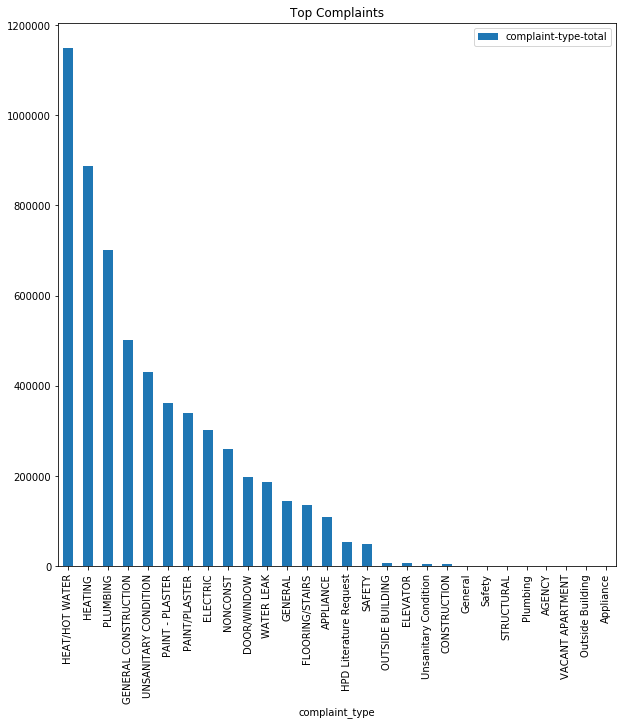

In [111]:
df_311_complaints = pd.DataFrame(df_311_grouped["complaint-type-total"])
df_311_complaints.plot(kind="bar", figsize=(10,10), title="Top Complaints")

There seems to be some categories split in different types of complaints:
- Heat/Hot Water with Heating
- Paint - Plaster with Paint/Plaster

Let's consolidate the total for those types that seem to be of the same category

In [112]:
HEAT_TOTAL = df_311_complaints['complaint-type-total']['HEAT/HOT WATER'] + df_311_complaints['complaint-type-total']['HEATING']
PP_TOTAL = df_311_complaints['complaint-type-total']['PAINT - PLASTER'] + df_311_complaints['complaint-type-total']['PAINT/PLASTER']
print ("%s%s" % ("HEAT/HOT WATER + HEATING: ", HEAT_TOTAL))
print ("%s%s" % ("PAINT - PLASTER + PAINT/PLASTER: ", PP_TOTAL))

HEAT/HOT WATER + HEATING: 2036150
PAINT - PLASTER + PAINT/PLASTER: 700995


### Visualize results

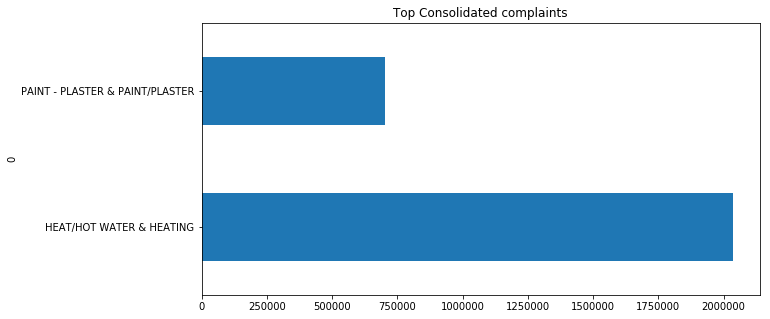

In [113]:
arr_consolidated[0][0] = "HEAT/HOT WATER & HEATING"
arr_consolidated[0][1] = HEAT_TOTAL
arr_consolidated[1][0] = "PAINT - PLASTER & PAINT/PLASTER"
arr_consolidated[1][1] = PP_TOTAL
df_consolidated = pd.DataFrame(arr_consolidated)
df_consolidated.plot(kind="barh", x=0, title="Top Consolidated complaints", legend=False, figsize=(10,5))

# Conclusion 

- <b>Top Complaints</b> chart shows that <b><HEAT/HOT WATER</b> is clearly the TOP complaint type
- There were some <b> complaint-types</b> that looked with a similar description

<ul> Consolidating similar description complaints, did not change the initial conclusion as shown on <b> Top Consolidated complaints </b> chart.</ul>